## Businesscase: 
### Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

## Domain Analysis

In [1]:
# Impart the required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
recovered_data=pd.read_csv('time_series_covid19_recovered_global.csv')
deaths_data=pd.read_csv('time_series_covid19_deaths_global.csv')
confirmed_data=pd.read_csv('time_series_covid19_confirmed_global.csv')

## Basic check

In [3]:
# Check all the columns
pd.set_option('display.max_columns',None)

In [4]:
# Check all the rows
pd.set_option('display.max_rows',None)

In [5]:
# check the five columns in deaths dataset
deaths_data.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        0        0        0        0       0       0       0       0       0   
1        0        0        0        0       0       0       0       0       0   
2        0        0        0        0       0       0       0       0       0   
3        0        0        0        0       0       0       0       0       0   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        1        1        1   
2       0       0       0       0        0        0        1        2   
3       0       0       0       0        0        0        0        0   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        1        2        2        2        2   
2        3        4        4        4        7        9       11       15   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0        1        1        1        2        4        4        4        4   
1        2        4        5        5        6        8       10       10   
2       17       17       19       21       25       26       29       31   
3       

In [6]:
# Check the 
deaths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [7]:
# check statstic mathmetic information of every integer columns in dataset
deaths_data.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    0.063910    0.067669    0.097744    0.157895   
std     24.904600   70.191330    1.042337    1.043908    1.473615    2.453621   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20     1/30/20     1/31/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean     0.210526    0.308271    0.492481    0.500000    0.642857    0.800752   
std      3.189730    4.660845    7.664297    7.664793    9.933187   12.507875   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     52.000000   76.000000  125.000000  125.000000  162.000000  204.000000   

           2/1/20      2/2/20      2/3/20      2/4/20      2/5/20      2/6/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean     0.973684    1.360902    1.601504    1.849624    2.120301    2.383459   
std     15.266540   21.458635   25.382490   29.367546   33.659009   37.889556   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max    249.000000  350.000000  414.000000  479.000000  549.000000  618.000000   

           2/7/20      2/8/20      2/9/20     2/10/20      2/11/20  \
count  266.000000  266.000000  266.000000  266.000000   266.000000   
mean     2.703008    3.030075    3.406015    3.808271     4.184211   
std     42.855331   47.821277   53.400027   59.714706    65.477808   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max    699.000000  780.000000  871.000000  974.000000  1068.000000   

           2/12/20      2/13/20      2/14/20      2/15/20      2/16/20  \
count   266.000000   266.000000   266.000000   266.000000   266.000000   
mean      4.203008     5.154135     5.725564     6.263158     6.654135   
std      65.477435    80.313740    89.326726    97.848816   103.979029   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    1068.000000  1310.000000  1457.000000  1596.000000  1696.000000   

           2/17/20      2/18/20      2/19/20      2/20/20      2/21/20  \
count   266.000000   266.000000   266.000000   266.000000   266.000000   
mean      7.022556     7.548872     7.981203     8.451128     8.466165   
std     109.681320   117.774294   124.394608   131.443278   131.442536   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%     

In [8]:
# check statstic mathmetic information of every object columns in dataset
deaths_data.describe(include=['O'])

Province/State Country/Region
count                             81            266
unique                            81            188
top     Australian Capital Territory          China
freq                               1             33

In [9]:
# We can see in Province/State have 81  Unique states and top starte is Australian Capital Territory.
# Country/Region have 266 counts and 188 unique country, there is china most frequent country as compared to others.

In [11]:
# check deaths date columns
cols=deaths_data.columns
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=248)

In [12]:
# Check only deaths dates columns
deaths=deaths_data.loc[:,cols[4]:cols[-1]]
deaths.head()       # check only first five rows

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
0        0        0       0       0       0       0       0       0       0   
1        0        0       0       0       0       0       0       0       0   
2        0        0       0       0       0       0       0       0       0   
3        0        0       0       0       0       0       0       0       0   
4        0        0       0       0       0       0       0       0       0   

   2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
0        0        0        0        0        0        0       0       0   
1        0        0        0        0        0        0       0       0   
2        0        0        0        0        0        0       0       0   
3        0        0        0        0        0        0       0       0   
4        0        0        0        0        0        0       0       0   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
0       0       0       0       0       0       0       0        0        0   
1       0       0       0       0       0       0       0        0        1   
2       0       0       0       0       0       0       0        0        0   
3       0       0       0       0       0       0       0        0        0   
4       0       0       0       0       0       0       0        0        0   

   3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        1        1        1        2        2   
2        1        2        3        4        4        4        7        9   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
0        0        0        1        1        1        2        4        4   
1        2        2        2        4        5        5        6        8   
2       11       15       17       17       19       21       25       26   
3        0        0        1        1        1        1        3        3   
4        0        0        0        0        0        0        0        0   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0        4        4        4        4       4       6       6       7       7   
1       10       10       11       15      15      16      17      20      20   
2       29       31       35       44      58      86   

In [13]:
# Check first five rows in recovered dataset
recovered_data.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        0        0        0        0       0       0       0       0       0   
1        0        0        0        0       0       0       0       0       0   
2        0        0        0        0       0       0       0       0       0   
3        0        0        0        0       0       0       0       0       0   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        0        0        0   
2       0       0       0       0        0        0        8        8   
3       0       0       0       0        0        0        1        0   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        1        1        1        1        1        1   
1        0        0        0        0        0        0        0        2   
2       12       12       12       12       12       32       32       32   
3        1        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0        1        1        1        2        2        2        2        2   
1        2        2       10       17       17       31       31       33   
2       65       65       24       65       29       29       31       31   
3       

In [14]:
# Check all thecolumns information 
recovered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB


In [15]:
# check statstic mathmetic information of every integer columns in dataset
recovered_data.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000   
mean    19.835137   27.997068    0.110672    0.118577    0.142292    0.154150   
std     24.504550   67.358197    1.760345    1.764332    1.954723    2.020714   
min    -51.796300 -106.346800    0.000000    0.000000    0.000000    0.000000   
25%      6.428055   -8.224500    0.000000    0.000000    0.000000    0.000000   
50%     21.521757   23.881300    0.000000    0.000000    0.000000    0.000000   
75%     39.305400   85.240100    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   28.000000   28.000000   31.000000   32.000000   

          1/26/20     1/27/20     1/28/20     1/29/20     1/30/20     1/31/20  \
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000   
mean     0.205534    0.241107    0.422925    0.498024    0.565217    0.877470   
std      2.649732    2.852382    5.059859    5.566071    5.723862    8.965366   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     42.000000   45.000000   80.000000   88.000000   90.000000  141.000000   

           2/1/20      2/2/20      2/3/20      2/4/20      2/5/20      2/6/20  \
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000   
mean     1.122530    1.865613    2.462451    3.367589    4.442688    5.877470   
std     10.730686   18.737687   24.543684   33.234187   40.512413   52.353924   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max    168.000000  295.000000  386.000000  522.000000  633.000000  817.000000   

            2/7/20       2/8/20       2/9/20      2/10/20      2/11/20  \
count   253.000000   253.000000   253.000000   253.000000   253.000000   
mean      7.948617    10.339921    12.822134    15.596838    18.509881   
std      71.396899    92.314954   115.039106   142.186509   168.753592   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    1115.000000  1439.000000  1795.000000  2222.000000  2639.000000   

           2/12/20      2/13/20      2/14/20      2/15/20      2/16/20  \
count   253.000000   253.000000   253.000000   253.000000   253.000000   
mean     20.355731    24.881423    31.849802    37.134387    42.944664   
std     173.039104   221.634660   303.958894   357.566163   421.564533   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    2686.000000  3459.000000  4774.000000  5623.000000  6639.000000   

           2/17/20      2/18/20       2/19/20       2/20/20       2/21/20  \
count   253.000000   253.000000    253.000000    253.000000    253.000000   
mean     49.735178    56.727273     63.719368     71.845850     74.664032   
std     498.638310   578.156053    654.435905    745.897395    752.783139   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.000000      0.000000      0.000000      0.000000   
50%       0.000000     0.000

In [16]:
# check all information of every object columns in dataset
recovered_data.describe(include=['O'])

Province/State Country/Region
count                             67            253
unique                            67            188
top     Australian Capital Territory          China
freq                               1             33

In [17]:
# We can see in Province/State, There are 67 unique states and Australian Capital Territory	 is most frequent states.
# We can see in Country/Region, There are 188 unique country and China is most frequent country as campared to others.

In [18]:
# Check only recovered columns date
recovered=recovered_data.loc[:,cols[4]:cols[-1]]
recovered.head()     ## check only first five rows

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
0        0        0       0       0       0       0       0       0       0   
1        0        0       0       0       0       0       0       0       0   
2        0        0       0       0       0       0       0       0       0   
3        0        0       0       0       0       0       0       0       0   
4        0        0       0       0       0       0       0       0       0   

   2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
0        0        0        0        0        0        0       0       0   
1        0        0        0        0        0        0       0       0   
2        0        0        0        0        0        0       0       0   
3        0        0        0        0        0        0       0       0   
4        0        0        0        0        0        0       0       0   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
0       0       0       0       0       0       0       0        0        0   
1       0       0       0       0       0       0       0        0        0   
2       0       0       0       0       0       0       0        0        0   
3       0       0       0       0       0       0       0        0        0   
4       0       0       0       0       0       0       0        0        0   

   3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
0        0        0        0        0        1        1        1        1   
1        0        0        0        0        0        0        0        0   
2        8        8       12       12       12       12       12       32   
3        1        0        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
0        1        1        1        1        1        2        2        2   
1        0        2        2        2       10       17       17       31   
2       32       32       65       65       24       65       29       29   
3        1        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
0        2        2        2        5       5      10      10      10      15   
1       31       33       44       52      67      76      89      99     104   
2       31       31       37       46      61      61   

In [19]:
# check first five rows in confirmed dataset
confirmed_data.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        1        1   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        1        1        1        1       1       1       1       1       1   
1        0        0        0        0       0       0       0       0       0   
2        1        1        1        1       1       3       5      12      12   
3        0        0        0        0       0       1       1       1       1   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       1       1       4       4        5        7        7        7   
1       0       0       0       2       10       12       23       33   
2      17      17      19      20       20       20       24       26   
3       1       1       1       1        1        1        1        1   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0       11       16       21       22       22       22       24       24   
1       38       42       51       55       59       64       70       76   
2       37       48       54       60       74       87       90      139   
3        1        1        2       39       39       53       75       88   
4        0        0        0        0        0        0        1        2   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0       40       40       74       84       94      110      110      120   
1       89      104      123      146      174      186      197      212   
2      201      230      264      302      367      409      454      511   
3      1

In [20]:
# Check all the columns information in confirmed_data dataset
confirmed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [21]:
# check statstic mathmetic information of every integer columns in dataset
confirmed_data.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    2.086466    2.458647    3.537594    5.390977   
std     24.904600   70.191330   27.279200   27.377862   34.083035   47.434934   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20      1/30/20  \
count   266.000000   266.000000   266.000000   266.000000   266.000000   
mean      7.962406    11.003759    20.969925    23.180451    30.954887   
std      66.289178    89.313757   219.187744   220.524977   303.897894   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max    1058.000000  1423.000000  3554.000000  3554.000000  4903.000000   

           1/31/20       2/1/20        2/2/20        2/3/20        2/4/20  \
count   266.000000   266.000000    266.000000    266.000000    266.000000   
mean     37.315789    45.255639     63.109023     74.763158     89.842105   
std     360.297673   443.366813    689.035590    832.953418   1026.582242   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.000000      0.000000      0.000000      0.000000   
50%       0.000000     0.000000      0.000000      0.000000      0.000000   
75%       0.000000     0.000000      0.000000      0.000000      0.000000   
max    5806.000000  7153.000000  11177.000000  13522.000000  16678.000000   

             2/5/20        2/6/20        2/7/20        2/8/20        2/9/20  \
count    266.000000    266.000000    266.000000    266.000000    266.000000   
mean     103.921053    115.796992    129.304511    139.582707    150.973684   
std     1209.754647   1359.927896   1534.122760   1665.831961   1820.905815   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    19665.000000  22112.000000  24953.000000  27100.000000  29631.000000   

            2/10/20       2/11/20       2/12/20       2/13/20       2/14/20  \
count    266.000000    266.000000    266.000000    266.000000    266.000000   
mean     160.781955    168.458647    170.030075    226.996241    251.533835   
std     1949.402861   2049.809414   2050.149390   2958.034534   3337.708666   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max    31728.000000  33366.000000  33366.000000  48206.000000  54406.000000   

            2/15/20       2/16/20       2/17/20       2/18/20       2/19/20  \
count    266.000000    266.000000    266.000000    266.000000    266.000000   
mean     259.586466    267.796992    275.447368    282.522556    284.402256   
std     3450.661369   3569.103387   3679.809248   3783.531445   3804.941211   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      

In [22]:
# check statstic mathmetic information of every object columns in dataset
confirmed_data.describe(include=['O'])

Province/State Country/Region
count                             81            266
unique                            81            188
top     Australian Capital Territory          China
freq                               1             33

In [23]:
# We can see in Province/State have 81  Unique states and top starte is Australian Capital Territory.
# Country/Region have 266 counts and 188 unique country, there is china most frequent country as compared to others.

In [24]:
# check the confirmed tates columns
confirmed=confirmed_data.loc[:,cols[4]:cols[-1]]
confirmed

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
5          0        0        0        0        0        0        0        0   
6          0        0        0        0        0        0        0        0   
7          0        0        0        0        0        0        0        0   
8          0        0        0        0        0        0        0        0   
9          0        0        0        0        3        4        4        4   
10         0        0        0        0        0        0        0        0   
11         0        0        0        0        0        0        0        1   
12         0        0        0        0        0        0        0        0   
13         0        0        0        0        0        0        0        0   
14         0        0        0        0        1        1        1        1   
15         0        0        0        0        0        0        0        0   
16         0        0        0        0        0        0        0        0   
17         0        0        0        0        0        0        0        0   
18         0        0        0        0        0        0        0        0   
19         0        0        0        0        0        0        0        0   
20         0        0        0        0        0        0        0        0   
21         0        0        0        0        0        0        0        0   
22         0        0        0        0        0        0        0        0   
23         0        0        0        0        0        0        0        0   
24         0        0        0        0        0        0        0        0   
25         0        0        0        0        0        0        0        0   
26         0        0        0        0        0        0        0        0   
27         0        0        0        0        0        0        0        0   
28         0        0        0        0        0        0        0        0   
29         0        0        0        0        0        0        0        0   
30         0        0        0        0        0        0        0        0   
31         0        0        0        0        0        0        0        0   
32         0        0        0        0        0        0        0        0   
33         0        0        0        0        0        0        0        0   
34         0        0        0        0        0        0        0        0   
35         0        0        0        0        0        0        0        0   
36         0        0        0        0        0        0        0        0   
37         0        0        0        0        0        1        1        1   
38         0        0        0        0        0        0        0        0   
39         0        0        0        0        0        0        0        0   
40         0        0        0        0        0        0        1        1   
41         0        0        0        0        0        0        0        0   
42         0        0        0        0        0        0        0        0   
43         0        0        0        0        0        0        0        0   
44         0        0        0        0        0        0        0        0   
45         0        0        0        0        0        0        0        0   
46         0        0        0        0        0        0        0        0   
47         0        0        0        0        0        0        0        0   
48         0        0        0        0        1        1        1        1   
49         0        0        0        0        0       

# Data preprocessing and Feature engineering

In [25]:
# Check the null value in confirmed data
confirmed_data.isnull().sum()     # In Province/State there are null values.

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
2/17/20             0
2/18/20             0
2/19/20             0
2/20/20             0
2/21/20             0
2/22/20             0
2/23/20             0
2/24/20             0
2/25/20             0
2/26/20             0
2/27/20             0
2/28/20             0
2/29/20             0
3/1/20              0
3/2/20              0
3/3/20    

In [26]:
# check the null value in recovered data
recovered_data.isnull().sum()        ## In Province/State there are null values.

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
2/17/20             0
2/18/20             0
2/19/20             0
2/20/20             0
2/21/20             0
2/22/20             0
2/23/20             0
2/24/20             0
2/25/20             0
2/26/20             0
2/27/20             0
2/28/20             0
2/29/20             0
3/1/20              0
3/2/20              0
3/3/20    

In [27]:
# Check the null value in Deaths data
deaths_data.isnull().sum()        ## In Province/State there are null values.

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
2/17/20             0
2/18/20             0
2/19/20             0
2/20/20             0
2/21/20             0
2/22/20             0
2/23/20             0
2/24/20             0
2/25/20             0
2/26/20             0
2/27/20             0
2/28/20             0
2/29/20             0
3/1/20              0
3/2/20              0
3/3/20    

In [28]:
# assign the all dates columns in dates variable
dates=confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [54]:
# Create the empty list and append the sum of confirmed ,deaths and recoveries cases.
world_confirmed_cases=[]
world_death_cases=[]
world_recovered_cases=[]

india_confirmed_cases=[]
india_deaths_cases=[]
india_recovered_cases=[]


for i in dates:
    total_confirmed_cases=confirmed[i].sum()
    total_death_cases=deaths[i].sum()
    total_recovered_cases=recovered[i].sum()
    
    world_confirmed_cases.append(total_confirmed_cases)
    world_death_cases.append(total_death_cases)
    world_recovered_cases.append(total_recovered_cases)
    
    india_confirmed_cases.append(confirmed_data[confirmed_data["Country/Region"]=='India'][i].sum())
    india_deaths_cases.append(deaths_data[deaths_data["Country/Region"]=='India'][i].sum())
    india_recovered_cases.append(recovered_data[recovered_data["Country/Region"]=='India'][i].sum())
    

In [55]:
print(world_confirmed_cases)

[555, 654, 941, 1434, 2118, 2927, 5578, 6166, 8234, 9926, 12038, 16787, 19887, 23898, 27643, 30802, 34395, 37129, 40159, 42768, 44810, 45228, 60381, 66908, 69050, 71234, 73269, 75151, 75651, 76211, 76840, 78601, 78981, 79545, 80398, 81375, 82735, 84120, 86013, 88395, 90372, 92957, 95272, 98028, 102018, 106036, 109993, 113946, 118967, 126675, 132450, 146783, 157801, 169032, 183677, 199391, 218683, 245633, 275963, 307709, 341784, 384630, 425787, 476680, 539069, 603910, 671653, 731267, 795997, 872495, 948663, 1030010, 1113203, 1193711, 1265377, 1338067, 1415186, 1498895, 1585483, 1672988, 1749872, 1846819, 1916464, 1986284, 2067245, 2163941, 2251672, 2325485, 2406054, 2479522, 2554727, 2631781, 2720583, 2807495, 2892296, 2965076, 3034072, 3109425, 3186589, 3270117, 3357276, 3438689, 3516333, 3592506, 3672660, 3762727, 3851894, 3943470, 4029169, 4105292, 4181640, 4265367, 4350206, 4447281, 4543711, 4639021, 4717335, 4805823, 4902461, 5005574, 5111869, 5218664, 5323977, 5419242, 5506311, 55

In [56]:
print(world_death_cases)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2008, 2123, 2248, 2252, 2459, 2470, 2630, 2710, 2771, 2814, 2873, 2942, 2996, 3085, 3160, 3255, 3348, 3460, 3559, 3803, 3987, 4267, 4611, 4917, 5414, 5834, 6475, 7153, 7964, 8867, 9981, 11460, 13180, 14854, 16797, 19079, 21877, 24893, 28388, 32102, 35572, 39620, 44365, 49863, 56101, 62205, 68351, 73540, 79481, 87712, 94464, 102237, 109629, 115854, 121671, 127587, 134567, 142918, 150221, 158588, 164601, 169862, 175726, 182917, 189644, 196485, 203142, 208774, 212708, 217382, 223929, 230657, 236559, 241722, 247205, 250694, 254808, 260714, 267277, 272579, 278054, 282287, 285874, 289354, 294889, 299981, 305171, 310304, 314424, 317712, 321412, 326158, 330926, 335657, 340851, 344742, 347870, 349062, 353180, 358326, 362944, 367536, 371610, 374478, 377554, 382296, 387745, 392879, 397453, 401265, 404006, 407707, 412562, 417623, 422322, 426545, 430722, 434129, 

In [57]:
print(world_recovered_cases)

[28, 30, 36, 39, 52, 61, 107, 126, 143, 222, 284, 472, 623, 852, 1124, 1487, 2011, 2616, 3244, 3946, 4683, 5150, 6295, 8058, 9395, 10865, 12583, 14352, 16121, 18177, 18890, 22886, 23394, 25227, 27905, 30384, 33277, 36711, 39782, 42716, 45602, 48228, 51170, 53796, 55865, 58359, 60694, 62493, 64404, 67002, 68324, 70251, 72622, 76032, 78086, 80838, 83321, 84958, 87403, 91670, 97885, 98351, 107992, 113775, 122145, 130921, 139424, 148891, 164337, 177825, 192918, 209967, 225415, 245832, 259672, 276252, 299643, 328359, 353707, 375509, 401766, 421180, 448347, 473436, 510106, 540926, 567049, 590968, 622623, 644613, 679456, 709881, 738661, 788712, 816491, 845096, 872865, 906136, 948318, 1013284, 1051537, 1092416, 1124732, 1158819, 1195359, 1241365, 1280833, 1317383, 1370933, 1404527, 1451521, 1488542, 1544398, 1584114, 1632122, 1688714, 1729621, 1782542, 1834647, 1893575, 1944840, 2053491, 2108462, 2163902, 2227625, 2282839, 2346232, 2413089, 2490435, 2560888, 2637208, 2692105, 2796228, 2875332,

In [58]:
print(india_confirmed_cases)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 499, 536, 657, 727, 887, 987, 1024, 1251, 1397, 1998, 2543, 2567, 3082, 3588, 4778, 5311, 5916, 6725, 7598, 8446, 9205, 10453, 11487, 12322, 13430, 14352, 15722, 17615, 18539, 20080, 21370, 23077, 24530, 26283, 27890, 29451, 31324, 33062, 34863, 37257, 39699, 42505, 46437, 49400, 52987, 56351, 59695, 62808, 67161, 70768, 74292, 78055, 81997, 85784, 90648, 95698, 100328, 106475, 112028, 118226, 124794, 131423, 138536, 144950, 150793, 158086, 165386, 173491, 181827, 190609, 198370, 207191, 216824, 226713, 236184, 246622, 257486, 265928, 276146, 286605, 297535, 308993, 320922, 332424, 343091, 354065, 366946, 380532, 395048, 410451, 425282, 440215, 456183, 473105, 490401, 508953, 528859, 548318, 566840, 585481, 604641, 625544, 648315, 673165, 697413, 719664, 742417, 767296, 793802,

In [59]:
print(india_deaths_cases)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 4, 7, 10, 10, 12, 20, 20, 24, 27, 32, 35, 58, 72, 72, 86, 99, 136, 150, 178, 226, 246, 288, 331, 358, 393, 405, 448, 486, 521, 559, 592, 645, 681, 721, 780, 825, 881, 939, 1008, 1079, 1154, 1223, 1323, 1391, 1566, 1693, 1785, 1889, 1985, 2101, 2212, 2294, 2415, 2551, 2649, 2753, 2871, 3025, 3156, 3302, 3434, 3584, 3726, 3868, 4024, 4172, 4344, 4534, 4711, 4980, 5185, 5408, 5608, 5829, 6088, 6363, 6649, 6946, 7207, 7473, 7750, 8102, 8498, 8884, 9195, 9520, 9900, 11903, 12237, 12573, 12948, 13254, 13699, 14011, 14476, 14894, 15301, 15685, 16095, 16475, 16893, 17400, 17834, 18213, 18655, 19268, 19693, 20159, 20642, 21129, 21604, 22123, 22673, 23174, 23727, 24309, 24914, 25602, 26273, 26816, 27497, 28082, 28732, 29861, 30601, 31358, 32060, 32771, 33408, 34193, 34955, 35718, 36511, 37364, 38135, 38938, 39795, 40699,

In [60]:
print(india_recovered_cases)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 13, 13, 14, 14, 15, 20, 23, 27, 27, 40, 43, 45, 73, 84, 95, 102, 123, 148, 191, 192, 229, 229, 375, 421, 506, 620, 774, 969, 1080, 1181, 1359, 1432, 1768, 2041, 2463, 2854, 3273, 3975, 4370, 5012, 5498, 5939, 6523, 7137, 7747, 8437, 9068, 10007, 10819, 11775, 12847, 14142, 15331, 16776, 17887, 19301, 20969, 22549, 24420, 26400, 27969, 30258, 34224, 36795, 39233, 42309, 45422, 48553, 51824, 54385, 57692, 60706, 64277, 67749, 70920, 82627, 86936, 91852, 95754, 100285, 104071, 108450, 113233, 118695, 123848, 129095, 134670, 135206, 147195, 154330, 162379, 169798, 180013, 186935, 194325, 204711, 213831, 227728, 237196, 248190, 258685, 271697, 285637, 295881, 309713, 321723, 334822, 347912, 359860, 379892, 394227, 409083, 424433, 439934, 456831, 476378, 495513, 515386, 534618, 553471, 571460, 592032, 612768, 635757, 653751, 677423, 7

In [61]:
total_days = 1
days_date = []   #create the empty list

# Assuming dates is a list of dates
for i in range(len(dates)):
    total_days= i * 1
    days_date.append(total_days)

print(days_date)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [62]:
print(total_days)

243


In [63]:
confirmed_case_latest = confirmed_data[dates[-1]]
death_case_latest = deaths_data[dates[-1]]
recover_case_latest = recovered_data[dates[-1]]

In [33]:
print(confirmed_case_latest)

0        39074
1        12535
2        50023
3         1681
4         4117
5           96
6       640147
7        47552
8          113
9         4206
10          33
11        1153
12         466
13         230
14       20076
15         665
16       38658
17       39280
18        3418
19       65752
20      350621
21         189
22       75898
23      103392
24        1635
25        2294
26         261
27      130986
28       25521
29        2567
30     4558040
31         145
32       19014
33        1896
34        6471
35         474
36        5281
37         275
38       20598
39       16739
40        8208
41           0
42          13
43        1608
44         196
45         272
46           5
47        1086
48       49442
49          57
50       68128
51        1814
52          15
53        4786
54        1153
55      447468
56         991
57         935
58         584
59         396
60         170
61        1803
62         258
63         147
64         171
65         365
66        

In [34]:
print(death_case_latest)

0        1444
1         364
2        1679
3          53
4         154
5           3
6       13482
7         936
8           3
9          53
10          0
11          6
12          4
13         13
14        766
15          9
16        767
17        576
18         75
19        224
20       4979
21          7
22        785
23       9950
24         21
25         40
26          0
27       7654
28        770
29         13
30     137272
31          3
32        765
33         56
34        100
35          1
36         52
37          0
38        416
39        256
40        227
41          1
42          0
43         18
44          2
45          3
46          0
47         65
48       2879
49          0
50       5804
51         24
52          0
53         62
54         81
55      12298
56          6
57          9
58          6
59          1
60          2
61          8
62          2
63          2
64          6
65          6
66         13
67         22
68        103
69       4512
70          4
71    

In [35]:
print(recover_case_latest)

0        32576
1         6995
2        35180
3         1199
4         1449
5           92
6       508563
7        42637
8          110
9         2994
10          31
11        1124
12         462
13         217
14       18567
15         650
16       29516
17       36836
18        1771
19       58626
20      258717
21         173
22       73301
23       18977
24         967
25        1954
26         194
27       90240
28       18109
29         624
30     3993432
31         142
32       13727
33        1189
34        1445
35         462
36        4674
37         274
38       19124
39      127684
40        1830
41         967
42      421111
43         985
44         926
45         578
46         380
47         168
48        1774
49         254
50         145
51         165
52         357
53         935
54        1254
55        4717
56       63627
57        1015
58         259
59         664
60         934
61         155
62         262
63          46
64          75
65          18
66        

In [36]:
# Check all the unique country
unique_country=list(confirmed_data['Country/Region'].unique())
print(unique_country)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

In [37]:
country_confirmed_case = []     # here i'm creating list for country with comfirmed case
no_case = []    
# creating empty list for which country has no cases i will append that

for i in unique_country:    # running a loop
    cases = confirmed_case_latest[confirmed_data["Country/Region"]==i].sum() # creating a variables and adding their case with country wise 
    if cases > 0:
        country_confirmed_case.append(cases)  # where cases are 0 i'm appending in country_comfirmed_case
    else:
            no_case.append(i) 

In [38]:
for i in no_case:    #  For loop 
    unique_country.remove(i)   # which country have no case , remove it from unique country list

In [39]:
import operator
unique_country = [k for k, v in sorted(zip(unique_country,country_confirmed_case), key=operator.itemgetter(1),reverse=True)]

In [40]:
# here i'm going to get total case based on their country
for i in range(len(unique_country)):
    country_confirmed_case[i]=confirmed_case_latest[confirmed_data["Country/Region"]==unique_country[i]].sum()

In [47]:
country_with_confirmed_case=[]   # Create the empty list
for i in range(len(unique_country)):
   # print(f" Country name: {unique_country[i]}: Cases :- {country_confirmed_case[i]}")  # check the country name with confirmed case
    country_with_confirmed_case.append((f" Country name: {unique_country[i]}: Cases :-{country_confirmed_case[i]}"))

In [48]:
country_with_confirmed_case

[' Country name: US: Cases :-6856884',
 ' Country name: India: Cases :-5487580',
 ' Country name: Brazil: Cases :-4558040',
 ' Country name: Russia: Cases :-1105048',
 ' Country name: Colombia: Cases :-770435',
 ' Country name: Peru: Cases :-768895',
 ' Country name: Mexico: Cases :-700580',
 ' Country name: Spain: Cases :-671468',
 ' Country name: South Africa: Cases :-661936',
 ' Country name: Argentina: Cases :-640147',
 ' Country name: France: Cases :-496851',
 ' Country name: Chile: Cases :-447468',
 ' Country name: Iran: Cases :-425481',
 ' Country name: United Kingdom: Cases :-401122',
 ' Country name: Bangladesh: Cases :-350621',
 ' Country name: Saudi Arabia: Cases :-330246',
 ' Country name: Iraq: Cases :-322856',
 ' Country name: Pakistan: Cases :-306886',
 ' Country name: Turkey: Cases :-304610',
 ' Country name: Italy: Cases :-299506',
 ' Country name: Philippines: Cases :-290190',
 ' Country name: Germany: Cases :-275560',
 ' Country name: Indonesia: Cases :-248852',
 ' C

# EDA- Exploratory data Analysis

<BarContainer object of 188 artists>

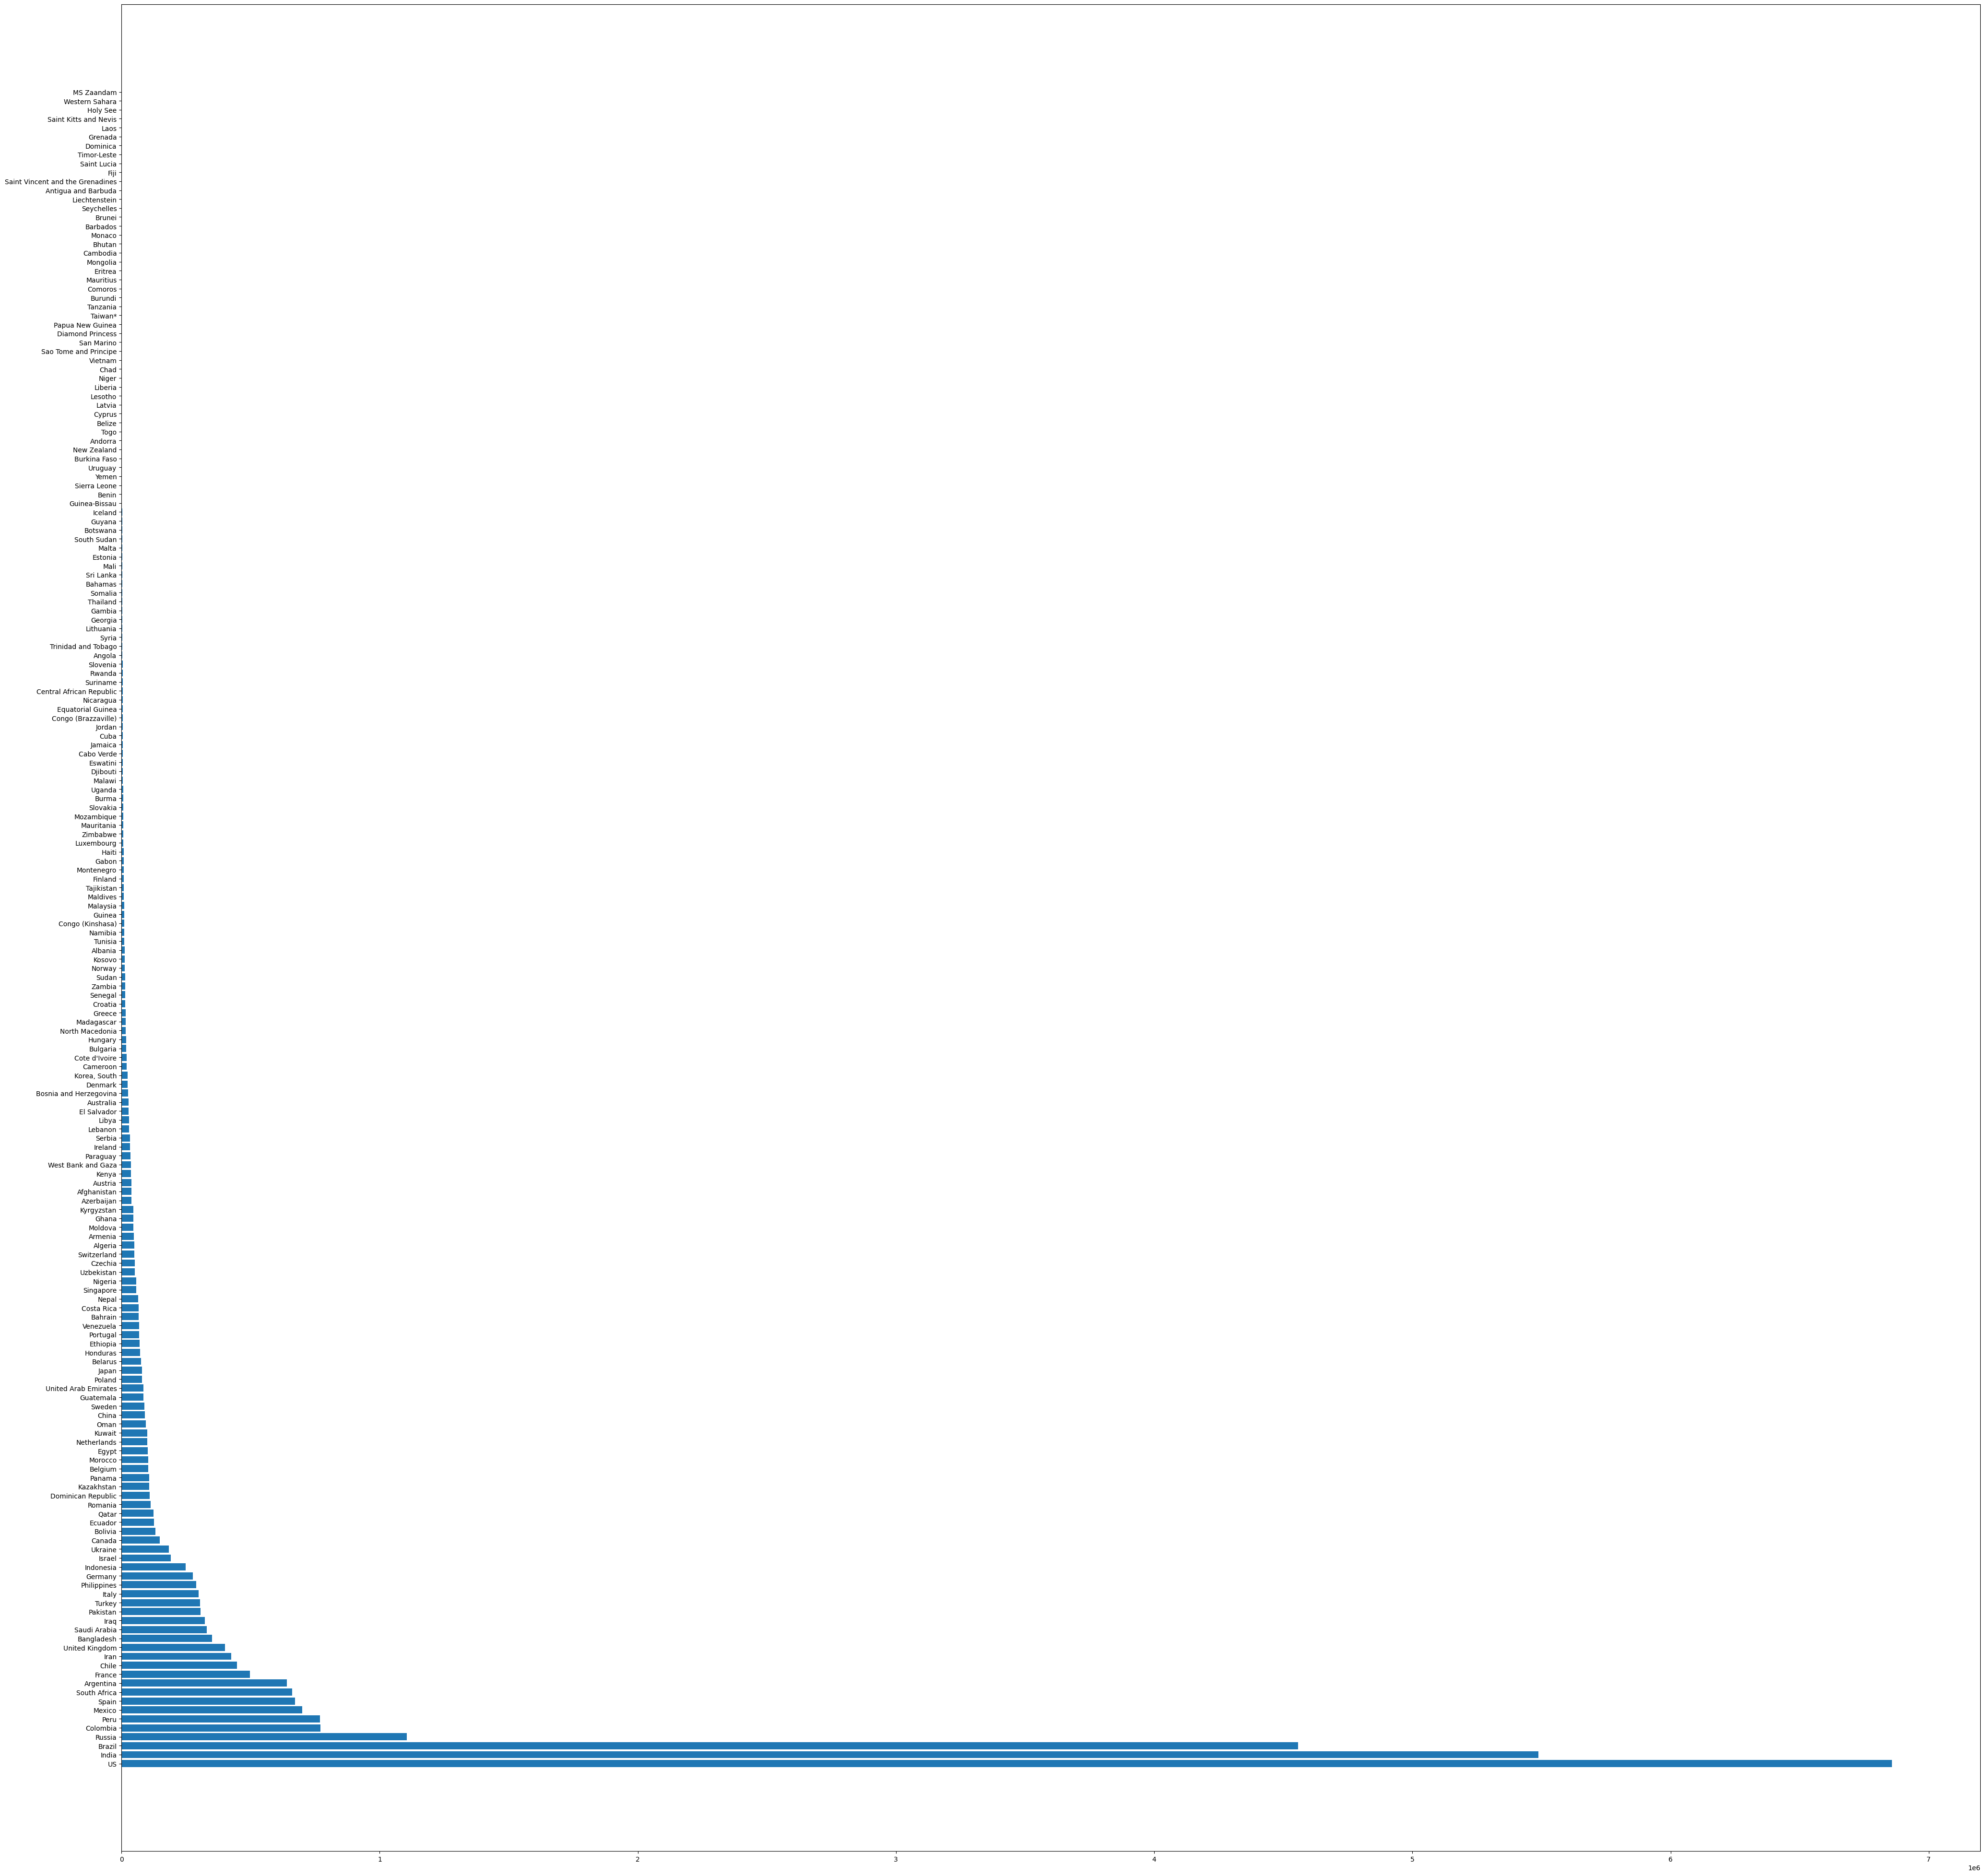

In [49]:
# Analyzing the unique country and country confirmed case
plt.figure(figsize=(50,50))
plt.barh(unique_country,country_confirmed_case)

In [50]:
# We can see in this graph ,US has maximum confirmed case as compared to other country and after that india.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


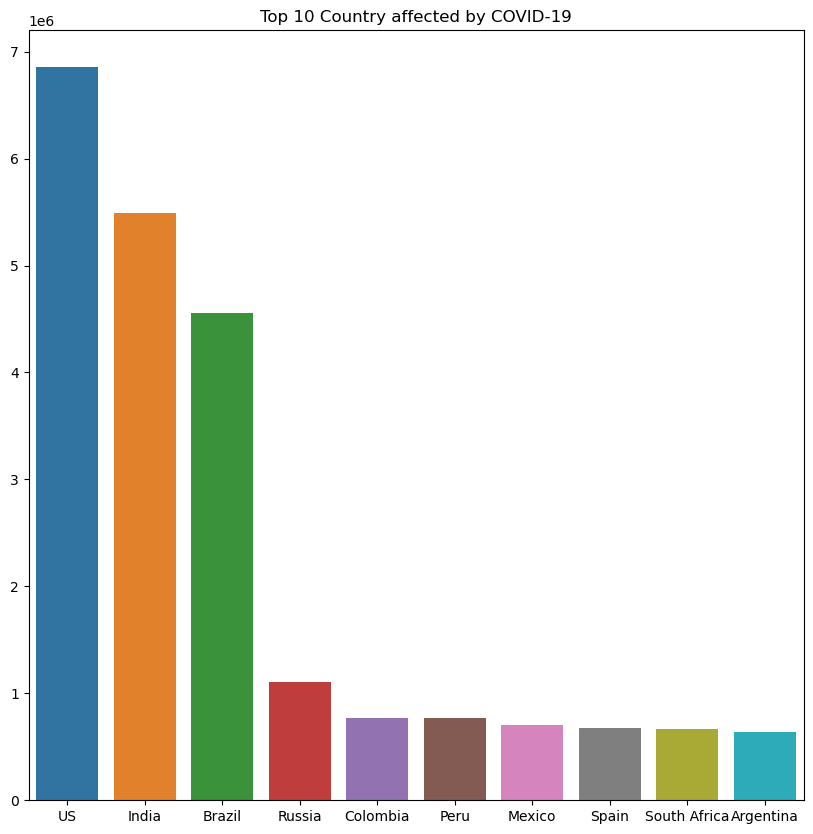

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(unique_country[:10],country_confirmed_case[:10])
plt.title('Top 10 Country affected by COVID-19')
plt.show()

In [65]:
# Us has highest confirmed cases.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

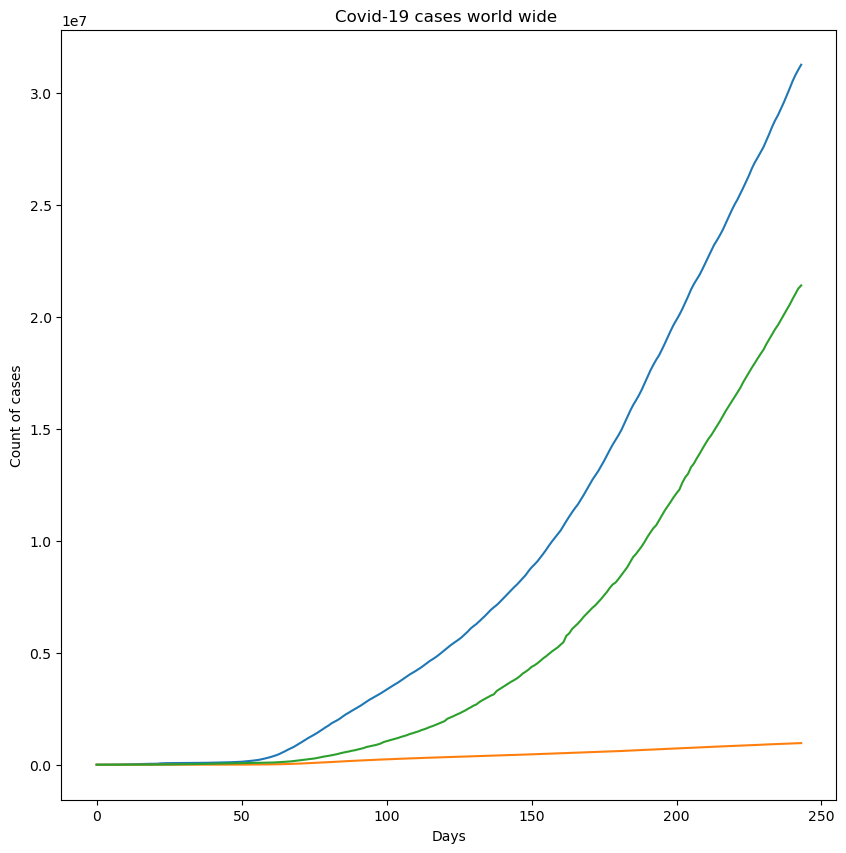

In [66]:
# Check the world wide cases based on dates 
plt.figure(figsize=(10,10))
plt.plot(days_date,world_confirmed_cases)
plt.plot(days_date,world_death_cases)
plt.plot(days_date,world_recovered_cases)
plt.title('Covid-19 cases world wide ')
plt.xlabel('Days',size=10)
plt.ylabel('Count of cases')
plt.xticks(size=10)
plt.xticks(size=10)

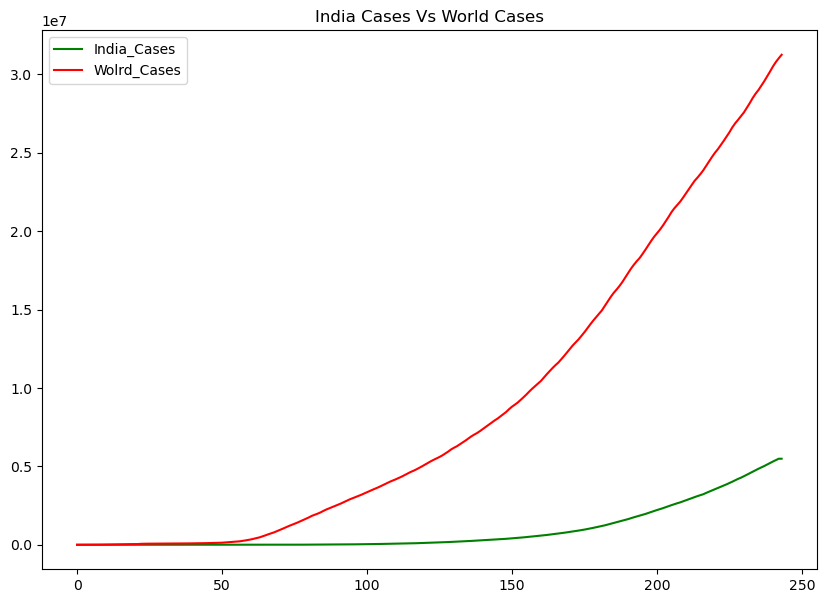

In [67]:
# Analyzing the india confirmed case and world confirmed cases
plt.figure(figsize=(10,7))
plt.plot(days_date,india_confirmed_cases,color='Green',label='India_Cases')
plt.plot(days_date,world_confirmed_cases,color='Red',label='Wolrd_Cases')
plt.title('India Cases Vs World Cases')
plt.legend(loc='best')

### Insight:
* We can see in this graph, Initaial period covid cases are less but after 50 days 
it is spread very fast all around the world.
* In India day 100 cases all most similar after that cases are increasing day by day. 

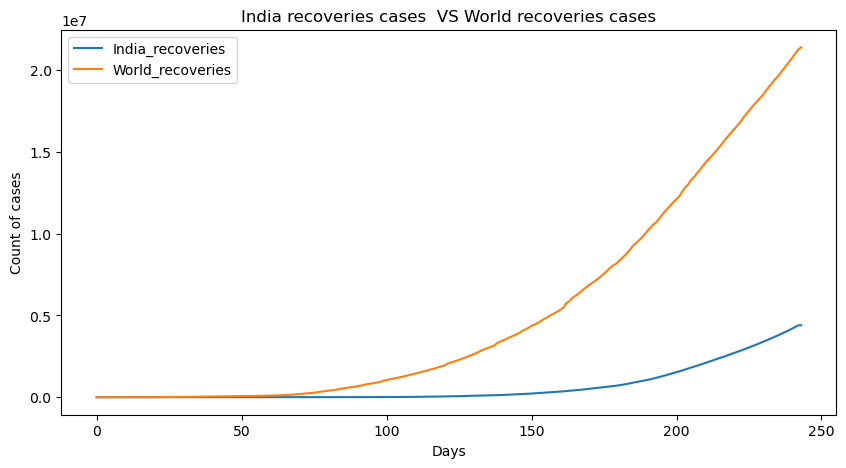

In [68]:
# Analyzing the India recoveries cases and world recoveries cases
plt.figure(figsize=(10,5))
plt.plot(days_date,india_recovered_cases,label='India_recoveries')
plt.plot(days_date,world_recovered_cases,label='World_recoveries')
plt.title('India recoveries cases  VS World recoveries cases')
plt.xlabel('Days')
plt.ylabel('Count of cases')
plt.legend(loc='best')

### Insight :
* We can see in this graph, Initaial period covid recoveries cases are less but after 75 days it is increasing.
* In India, We can see in the beginning recoveries are very less after 150 days it is started increasing.

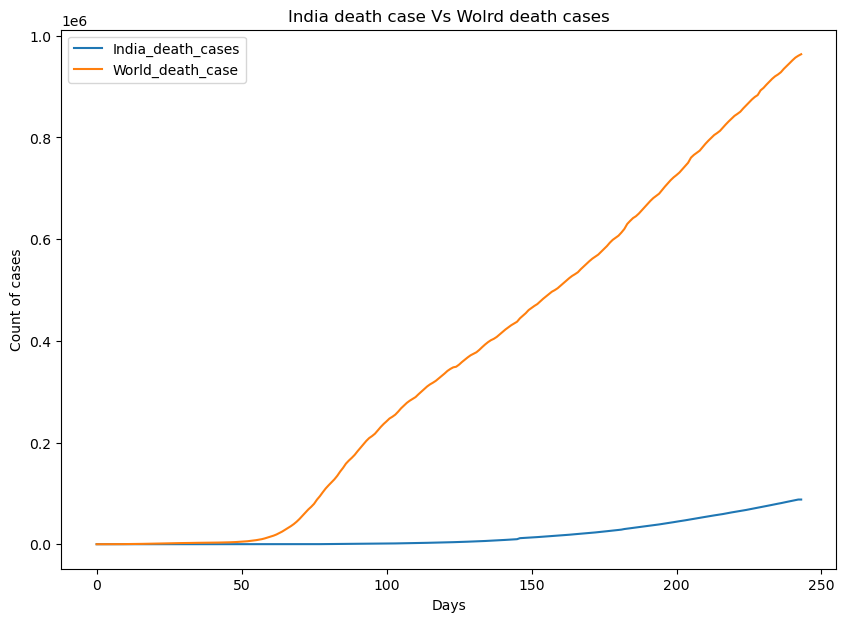

In [69]:
# Analyzing the india deaths case and Wolrd deaths cases
plt.figure(figsize=(10,7))
plt.plot(days_date,india_deaths_cases,label='India_death_cases')
plt.plot(days_date, world_death_cases,label='World_death_case')
plt.xlabel('Days')
plt.ylabel('Count of cases')
plt.title('India death case Vs Wolrd death cases')
plt.legend(loc='best')

### Insight :
* In this graph We can see, in the beginning World wide deaths cases are less and after 50 days it is highly increased.
* In India , We can see In the begnning deaths cases are very less and after 100 days it is started increasing.

# Feature selection

In [70]:
# Days is independent variabel and all the cases are dependent variable

world_confirmed_cases=np.array(world_confirmed_cases).reshape(-1,1)
world_death_cases=np.array(world_death_cases).reshape(-1,1)
world_recovered_cases=np.array(world_recovered_cases).reshape(-1,1)
India_confirmed_cases=np.array(india_confirmed_cases).reshape(-1,1)
india_deaths_cases=np.array(india_deaths_cases).reshape(-1,1)
india_recovered_cases=np.array(india_recovered_cases).reshape(-1,1)
days=np.array(days_date).reshape(-1,1)

# Model Creation

## World confirmed cases

In [71]:
# split the train and test data
from sklearn.model_selection import train_test_split
x_train_world_confirmed,x_test_world_confirmed,y_train_world_confirmed,y_test_world_confirmed=train_test_split(days,world_confirmed_cases)

In [72]:
x_train_world_confirmed

array([[ 32],
       [168],
       [194],
       [117],
       [ 52],
       [  3],
       [140],
       [121],
       [192],
       [161],
       [ 96],
       [171],
       [ 88],
       [ 80],
       [156],
       [ 75],
       [151],
       [ 16],
       [ 39],
       [178],
       [ 71],
       [110],
       [ 18],
       [  6],
       [135],
       [228],
       [  5],
       [224],
       [ 97],
       [ 17],
       [  1],
       [182],
       [ 41],
       [175],
       [191],
       [243],
       [238],
       [ 91],
       [ 14],
       [  0],
       [ 94],
       [214],
       [109],
       [195],
       [ 69],
       [169],
       [231],
       [204],
       [  9],
       [177],
       [120],
       [ 81],
       [216],
       [242],
       [137],
       [ 82],
       [180],
       [ 64],
       [157],
       [203],
       [ 84],
       [115],
       [190],
       [162],
       [206],
       [165],
       [ 50],
       [144],
       [239],
       [218],
       [236],
      

In [73]:
x_test_world_confirmed

array([[150],
       [100],
       [222],
       [152],
       [ 19],
       [ 23],
       [ 33],
       [130],
       [133],
       [209],
       [ 68],
       [183],
       [ 62],
       [ 95],
       [ 43],
       [ 47],
       [187],
       [ 11],
       [ 27],
       [ 61],
       [170],
       [  7],
       [ 73],
       [ 92],
       [237],
       [125],
       [188],
       [158],
       [ 24],
       [116],
       [  8],
       [123],
       [ 72],
       [146],
       [166],
       [126],
       [ 83],
       [234],
       [ 22],
       [213],
       [189],
       [ 99],
       [127],
       [215],
       [240],
       [ 89],
       [185],
       [ 28],
       [ 30],
       [211],
       [ 98],
       [ 78],
       [145],
       [143],
       [ 31],
       [ 37],
       [ 67],
       [205],
       [164],
       [136],
       [104]])

In [74]:
y_train_world_confirmed

array([[   78981],
       [12043466],
       [18278778],
       [ 4805823],
       [  157801],
       [    1434],
       [ 7389151],
       [ 5218664],
       [17847574],
       [10666930],
       [ 3034072],
       [12720381],
       [ 2406054],
       [ 1749872],
       [ 9778566],
       [ 1338067],
       [ 8935273],
       [   34395],
       [   88395],
       [14290096],
       [ 1030010],
       [ 4181640],
       [   40159],
       [    5578],
       [ 6779972],
       [27103845],
       [    2927],
       [26031410],
       [ 3109425],
       [   37129],
       [     654],
       [15225164],
       [   92957],
       [13557898],
       [17596559],
       [31245797],
       [29861949],
       [ 2631781],
       [   27643],
       [     555],
       [ 2892296],
       [23417506],
       [ 4105292],
       [18537524],
       [  872495],
       [12271553],
       [27862680],
       [20904123],
       [    9926],
       [14052261],
       [ 5111869],
       [ 1846819],
       [2388

In [75]:
y_test_world_confirmed

array([[ 8806595],
       [ 3357276],
       [25484767],
       [ 9073260],
       [   42768],
       [   66908],
       [   79545],
       [ 6187396],
       [ 6522099],
       [22134679],
       [  795997],
       [15507881],
       [  425787],
       [ 2965076],
       [   98028],
       [  113946],
       [16484206],
       [   16787],
       [   75151],
       [  384630],
       [12503942],
       [    6166],
       [ 1193711],
       [ 2720583],
       [29557942],
       [ 5598982],
       [16736727],
       [10119644],
       [   69050],
       [ 4717335],
       [    8234],
       [ 5419242],
       [ 1113203],
       [ 8186473],
       [11620802],
       [ 5701734],
       [ 1986284],
       [28758945],
       [   60381],
       [23211563],
       [17025889],
       [ 3270117],
       [ 5821183],
       [23643854],
       [30499534],
       [ 2479522],
       [16044757],
       [   75651],
       [   76840],
       [22675329],
       [ 3186589],
       [ 1585483],
       [ 804

# Linear Regression

In [76]:
# Import the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
poly_x_train_world_confirmed=poly.fit_transform(x_train_world_confirmed)
poly_x_test_world_confirmed=poly.fit_transform(x_test_world_confirmed)

In [77]:
lr1=LinearRegression()    # Object creation
lr1.fit(poly_x_train_world_confirmed,y_train_world_confirmed)

LinearRegression()

# Model Evaluation

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [79]:
# predicted test world confirmed cases
y_pred_confirmed=lr1.predict(poly_x_test_world_confirmed)

In [80]:
r2score1=r2_score(y_test_world_confirmed,y_pred_confirmed)
print('Test World confirmed cases r2 score:',r2score1)

Test World confirmed cases r2 score: 0.9991745783592433


In [81]:
# Predicted train wolrd confirmed cases
x_pred_confirmed=lr1.predict(poly_x_train_world_confirmed)

In [82]:
r2score2=r2_score(y_train_world_confirmed,x_pred_confirmed)
print('Train World confirmed cases r2 score:',r2score2)

Train World confirmed cases r2 score: 0.9992461785589098


In [83]:
print(mean_absolute_error(y_test_world_confirmed,y_pred_confirmed))
print(mean_squared_error(y_test_world_confirmed,y_pred_confirmed))

212851.96121307006
63827187206.56137


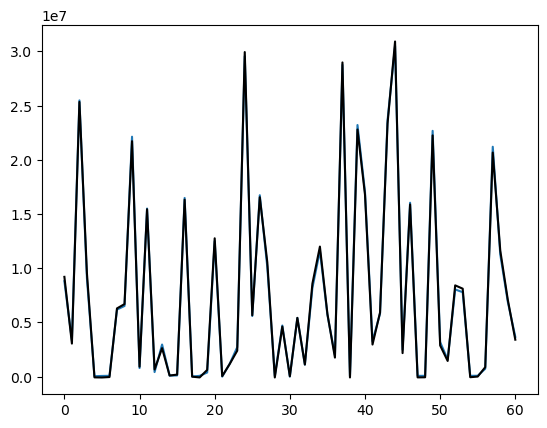

In [84]:
# Check the model performance by graph 
plt.plot(y_test_world_confirmed)
plt.plot(y_pred_confirmed,color='black')

In [85]:
## This model performance is well train with 99% accuracy and model is performing very well.

## World deaths cases

In [86]:
from sklearn.model_selection import train_test_split
x_train_world_deaths,x_test_world_deaths,y_train_world_deaths,y_test_world_deaths=train_test_split(days,world_death_cases,random_state=0,test_size=0.25)

In [87]:
x_train_world_deaths

array([[171],
       [ 89],
       [157],
       [219],
       [234],
       [205],
       [237],
       [ 16],
       [ 90],
       [101],
       [ 75],
       [  4],
       [109],
       [ 61],
       [146],
       [ 52],
       [ 66],
       [ 26],
       [134],
       [135],
       [217],
       [ 40],
       [ 13],
       [  3],
       [152],
       [ 24],
       [ 30],
       [218],
       [ 60],
       [ 56],
       [179],
       [214],
       [ 19],
       [182],
       [129],
       [ 54],
       [238],
       [ 80],
       [ 51],
       [123],
       [201],
       [130],
       [ 86],
       [ 10],
       [137],
       [173],
       [126],
       [ 41],
       [ 14],
       [ 27],
       [ 50],
       [221],
       [ 20],
       [162],
       [ 46],
       [166],
       [239],
       [160],
       [170],
       [ 62],
       [190],
       [159],
       [  2],
       [ 59],
       [149],
       [227],
       [ 43],
       [191],
       [139],
       [154],
       [112],
      

In [88]:
x_test_world_deaths

array([[ 64],
       [ 63],
       [ 55],
       [111],
       [225],
       [ 92],
       [ 76],
       [181],
       [188],
       [180],
       [ 73],
       [107],
       [150],
       [198],
       [224],
       [ 44],
       [145],
       [110],
       [243],
       [189],
       [210],
       [104],
       [138],
       [  8],
       [199],
       [203],
       [220],
       [125],
       [  5],
       [ 22],
       [ 74],
       [124],
       [ 12],
       [168],
       [ 45],
       [158],
       [ 37],
       [136],
       [212],
       [223],
       [222],
       [118],
       [231],
       [155],
       [209],
       [ 18],
       [108],
       [ 15],
       [ 71],
       [  7],
       [ 83],
       [176],
       [106],
       [156],
       [178],
       [ 97],
       [116],
       [ 33],
       [122],
       [161],
       [ 96]])

In [89]:
y_train_world_deaths

array([[561750],
       [175726],
       [496574],
       [837080],
       [920231],
       [760366],
       [934852],
       [   719],
       [182917],
       [247205],
       [ 79481],
       [    56],
       [285874],
       [ 16797],
       [444294],
       [  5834],
       [ 32102],
       [  1868],
       [392879],
       [397453],
       [825680],
       [  3085],
       [   492],
       [    42],
       [472311],
       [  1666],
       [  2252],
       [831566],
       [ 14854],
       [  8867],
       [602661],
       [808648],
       [  1013],
       [619920],
       [371610],
       [  7153],
       [940605],
       [115854],
       [  5414],
       [347870],
       [730973],
       [374478],
       [158588],
       [   259],
       [404006],
       [569553],
       [358326],
       [  3160],
       [   564],
       [  2008],
       [  4917],
       [846353],
       [  1113],
       [518361],
       [  3803],
       [534954],
       [946061],
       [508361],
       [556965

In [90]:
y_test_world_deaths

array([[ 24893],
       [ 21877],
       [  7964],
       [294889],
       [868733],
       [196485],
       [ 87712],
       [612998],
       [656545],
       [606829],
       [ 68351],
       [278054],
       [464746],
       [716089],
       [863028],
       [  3460],
       [437559],
       [289354],
       [963693],
       [663118],
       [787659],
       [260714],
       [407707],
       [   171],
       [721499],
       [743999],
       [842452],
       [353180],
       [    82],
       [  1371],
       [ 73540],
       [349062],
       [   426],
       [546257],
       [  3559],
       [499712],
       [  2873],
       [401265],
       [799224],
       [857015],
       [850535],
       [326158],
       [903686],
       [487411],
       [780909],
       [   906],
       [282287],
       [   634],
       [ 56101],
       [   133],
       [134567],
       [586332],
       [272579],
       [492109],
       [598609],
       [223929],
       [317712],
       [  2630],
       [344742

In [91]:
# Fit the train and test data using PolynomialFeature
poly_x_train_world_deaths=poly.fit_transform(x_train_world_deaths)
poly_x_test_world_deaths=poly.fit_transform(x_test_world_deaths)

In [92]:
lr2=LinearRegression()
lr2.fit(poly_x_train_world_deaths,y_train_world_deaths)

LinearRegression()

In [93]:
# Predict the test value of wolrd deaths cases
y_pred_deaths=lr2.predict(poly_x_test_world_deaths)

In [94]:
# check test r2score of world deaths 
r2score_deaths=r2_score(y_test_world_deaths,y_pred_deaths)
print('Test World deaths cases r2 score:',r2score_deaths)

Test World deaths cases r2 score: 0.9947794020704499


In [95]:
# Predict the train value of world deaths cases
x_pred_deaths=lr2.predict(poly_x_train_world_deaths)

In [96]:
# check train r2score of world deaths 
r2score_deaths=r2_score(y_train_world_deaths,x_pred_deaths)
print('Train World deaths cases r2 score:',r2score_deaths)

Train World deaths cases r2 score: 0.9959119078366689


In [97]:
# Check the mean absolute error and mean squared error
print(mean_absolute_error(y_test_world_deaths,y_pred_deaths))
print(mean_squared_error(y_test_world_deaths,y_pred_deaths))

17890.80335857187
481731932.64899117


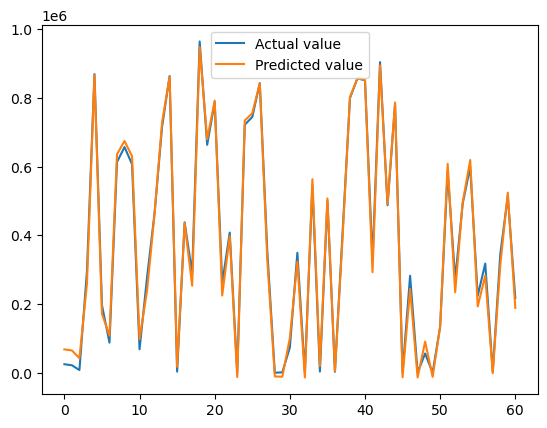

In [98]:
# check the model performance using the graph 
plt.plot(y_test_world_deaths,label='Actual value')  # Actual value 
plt.plot(y_pred_deaths,label='Predicted value')   # Predicted value
plt.legend(loc='best')

In [99]:
# In this graph we can see our model train so well with 99% accuracy and modle is doing very well. 

## India confirmed Cases

In [100]:
# data Split in training and testing
from sklearn.model_selection import train_test_split
x_train_india_confirmed,x_test_india_confirmed,y_train_india_confirmed,y_test_india_confirmed=train_test_split(days,india_confirmed_cases,random_state=0,test_size=0.25)

In [101]:
# Fit the polynomial feature in test and train data
poly_x_train_india_confirmed=poly.fit_transform(x_train_india_confirmed)
poly_x_test_india_confirmed=poly.fit_transform(x_test_india_confirmed)

In [102]:
lr3=LinearRegression()    # Object creation
lr3.fit(poly_x_train_india_confirmed,y_train_india_confirmed)   # Fit the model

LinearRegression()

In [103]:
# Predict the test india confirmed cases
y_pred_ind_confirmed=lr3.predict(poly_x_test_india_confirmed)

In [104]:
# Check r2 score of test india confirmed cases
r2score_ind_confirmed=r2_score(y_test_india_confirmed,y_pred_ind_confirmed)
print('Test India confirmed cases r2 score:',r2score_ind_confirmed)

Test India confirmed cases r2 score: 0.998012518760011


In [105]:
# Predict the train India confirmed cases
x_pred_ind_confirmed=lr3.predict(poly_x_train_india_confirmed)

In [106]:
# check the r2 score of train india confirmed cases
r2score_ind_confirmed1=r2_score(y_train_india_confirmed,x_pred_ind_confirmed)
print('Train India confirmed cases r2 score:',r2score_ind_confirmed1)

Train India confirmed cases r2 score: 0.99823026425284


In [107]:
# Check the mean absolute error and mean squared error
print(mean_absolute_error(y_test_india_confirmed,y_pred_ind_confirmed))
print(mean_squared_error(y_test_india_confirmed,y_pred_ind_confirmed))

51207.01478803629
3885110037.2668166


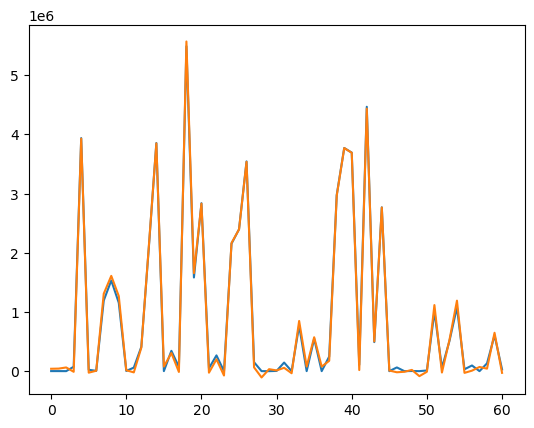

In [108]:
# Check the model preformance Using graph 
plt.plot(y_test_india_confirmed)
plt.plot(y_pred_ind_confirmed)

In [109]:
# We can see in this graph model train so well with 99% accuracy and modol is doing very well.

## India Deaths Cases

In [110]:
# Split the dataset in training an testing
from sklearn.model_selection import train_test_split
x_train_india_deaths,x_test_india_deaths,y_train_india_deaths,y_test_india_deaths=train_test_split(days,india_deaths_cases,random_state=0,test_size=0.25)

In [111]:
poly_x_train_india_deaths=poly.fit_transform(x_train_india_deaths)
poly_x_test_india_deaths=poly.fit_transform(x_test_india_deaths) 

In [112]:
lr4=LinearRegression()
lr4.fit(poly_x_train_india_deaths,y_train_india_deaths)

LinearRegression()

In [113]:
## Predict the test India deaths cases
y_pred_ind_deaths=lr4.predict(poly_x_test_india_deaths)

In [114]:
r2score_ind_deaths=r2_score(y_test_india_deaths,y_pred_ind_deaths)
print('Test india deaths cases r2 score :',r2score_ind_deaths)

Test india deaths cases r2 score : 0.9992211126155647


In [115]:
# predict the train india deaths cases
x_pred_ind_deaths=lr4.predict(poly_x_train_india_deaths)

In [116]:
r2score_ind_deaths_train=r2_score(y_train_india_deaths,x_pred_ind_deaths)
print('Train india deaths cases r2 score :',r2score_ind_deaths_train)

Train india deaths cases r2 score : 0.999426206718555


In [117]:
print(mean_absolute_error(y_test_india_deaths,y_pred_ind_deaths))
print(mean_squared_error(y_test_india_deaths,y_pred_ind_deaths))

475.363364910408
466931.93824650487


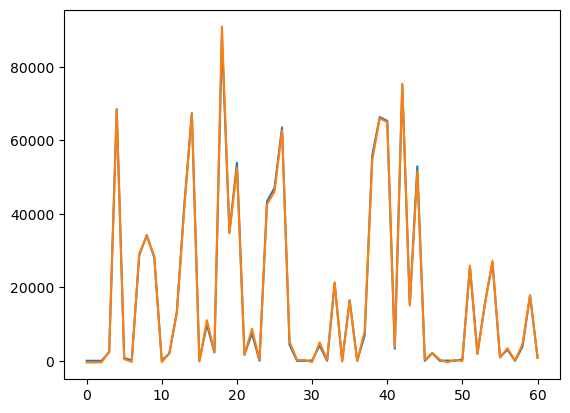

In [118]:
# Check the model preformance Using graph 
plt.plot(y_test_india_deaths)
plt.plot(y_pred_ind_deaths)

In [119]:
# We can see in this graph model train so well with 99% accuracy and modol is doing very well.

# Decision Tree Regression

## World confirmed cases

In [121]:
#Using the Decision tree regression model for prediction
from sklearn.tree import DecisionTreeRegressor           
dr=DecisionTreeRegressor()                               # Object creation
dr.fit(x_train_world_confirmed,y_train_world_confirmed)   # Fit the data

DecisionTreeRegressor()

In [123]:
# Predict the test for world confirmed cases 
y_pred_dr=dr.predict(x_test_world_confirmed)

In [125]:
# check the test r2 score 
r2score_dr=r2_score(y_test_world_confirmed,y_pred_dr)
print('Test world confirmed cases r2 score :',r2score_dr)

Test world confirmed r2 score : 0.9996497295931809


In [126]:
# Predict the train for world conformed cases
x_pred_dr=dr.predict(x_train_world_confirmed)

In [127]:
# check the train r2 score for world confirmed cases
r2score_dr_train=r2_score(y_train_world_confirmed,x_pred_dr)
print('Train world confirmed cases r2 score:',r2score_dr_train)

Train world confirmed r2 score: 1.0


## World deaths cases 

In [128]:
#Using the Decision tree regression model for prediction
from sklearn.tree import DecisionTreeRegressor           
dr1=DecisionTreeRegressor()                               # Object creation
dr1.fit(x_train_world_deaths,y_train_world_deaths)   # Fit the data

DecisionTreeRegressor()

In [129]:
# predict the test world deaths cases
y_pred_dr1=dr1.predict(x_test_world_deaths)

In [130]:
# check the test r2 score 
r2score_dr1=r2_score(y_test_world_deaths,y_pred_dr1)
print('Test world deaths cases r2 score :',r2score_dr1)

Test world confirmed cases r2 score : 0.9997097416267137


In [131]:
# Predict the train world deaths cases
x_pred_dr1=dr1.predict(x_train_world_deaths)

In [134]:
# # check the test r2 score 
r2score_dr1_train=r2_score(y_train_world_deaths,x_pred_dr1)
print('Train world deaths cases r2 score :',r2score_dr1_train)

Train world deaths cases r2 score : 1.0


## India confirmed cases

In [136]:
#Using the Decision tree regression model for prediction
from sklearn.tree import DecisionTreeRegressor           
dr2=DecisionTreeRegressor()                               # Object creation
dr2.fit(x_train_india_confirmed,y_train_india_confirmed)   # Fit the data

DecisionTreeRegressor()

In [138]:
## predict the test india confirmed cases
y_pred_dr2=dr2.predict(x_test_india_confirmed)

In [139]:
# check the test r2 score 
r2score_dr2=r2_score(y_test_india_confirmed,y_pred_dr2)
print('Test india confirmed cases r2 score :',r2score_dr2)

Test world deaths cases r2 score : 0.9990018798973708


In [142]:
# Predict the train india confirmed cases
x_pred_dr2=dr2.predict(x_train_india_confirmed)

In [143]:
r2score_dr2_train=r2_score(y_train_india_confirmed,x_pred_dr2)
print('Train india confirmed cases r2 score :',r2score_dr2_train)

Train india confirmed cases r2 score : 1.0


## India deaths Cases

In [144]:
#Using the Decision tree regression model for prediction
from sklearn.tree import DecisionTreeRegressor           
dr3=DecisionTreeRegressor()                               # Object creation
dr3.fit(x_train_india_deaths,y_train_india_deaths)   # Fit the data

DecisionTreeRegressor()

In [147]:
## predict the test india confirmed cases
y_pred_dr3=dr3.predict(x_test_india_deaths)

In [148]:
# check the test r2 score 
r2score_dr3=r2_score(y_test_india_deaths,y_pred_dr3)
print('Test india deaths cases r2 score :',r2score_dr3)

Test india deaths cases r2 score : 0.9993621803441114


In [151]:
# Predict the train india deaths cases
x_pred_dr3=dr3.predict(x_train_india_deaths)

In [152]:
r2score_dr3_train=r2_score(y_train_india_deaths,x_pred_dr3)
print('Train india deaths cases r2 score :',r2score_dr3_train)

Train india deaths cases r2 score : 1.0


 # Model Comparision Report

In [157]:
model=pd.DataFrame({'Model Name':['LinearRegression','DecisionTreeRegression'],
                   'R2_score_of_world_confirmed_cases':[r2score1,r2score_dr],
                   'R2_score_of_world_death_cases':[r2score_deaths,r2score_dr1],
                   'R2_score_of_India_confirmed_cases':[r2score_ind_confirmed,r2score_dr2],
                   'R2_score_of_india_death_cases':[r2score_ind_deaths,r2score_dr3]
                   })

In [158]:
model

Model Name  R2_score_of_world_confirmed_cases  \
0        LinearRegression                           0.999175   
1  DecisionTreeRegression                           0.999650   

   R2_score_of_world_death_cases  R2_score_of_India_confirmed_cases  \
0                       0.995912                           0.998013   
1                       0.999710                           0.999002   

   R2_score_of_india_death_cases  
0                       0.999221  
1                       0.999362

## Data Analysis Report

## Suggestions to the government health department of the country for preparation

## Challenges faced During Project